In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
from matplotlib.colors import LogNorm, Normalize
from scipy.signal import butter, lfilter, freqz,detrend



# Constants

## Radar constants

In [167]:
B = 194e6 # Sweep Bandwidth 
T =  1/B # Sweep Time
N = 256 # Sample Length
CPI =N*T # Coherent Processing Interval (CPI)
M = 4 # ignored samples
L = 256 # Chirp Total
c = 299792458 # Speed ​​of Light
f0 = 24028e6 # Start Frequency
f_R = 24.125e9 # freq radar
clk = 38461538 #Core clock
S_clk = 12 # Core clocks per sample
delay = 11106 #Initial delay

wave_length = c/f_R

NumRangeFFT = 256 # Range FFT Length
NumDopplerFFT = 256 # Doppler FFT Length

# Range
rangeRes = 150e6*(N+M)/(N*B) # Range Resolution
maxRange = (N-1)*rangeRes # Max Range
#speed
velRes = wave_length*clk/(2*N*(S_clk*(N+M)+delay)) # Velocity Resolution
maxVel = velRes * (N/2-1) # Max Velocity
print("Coherent Processing Interval (CPI): ", CPI)
print("Pulse length: ", T)
print("Wave length: ", wave_length)
print("Range Resolution: ", rangeRes)
print("Velocity Resolution: ", velRes*3.6, "km/h")
print("Max Range: ", maxRange)
print("Max Velocity: ", maxVel*3.6, "km/h")


Coherent Processing Interval (CPI):  1.3195876288659794e-06
Pulse length:  5.154639175257732e-09
Wave length:  0.01242663038341969
Range Resolution:  0.7852770618556701
Velocity Resolution:  0.23622712431983353 km/h
Max Range:  200.24565077319588
Max Velocity:  30.000844788618856 km/h


In [168]:
print(c/2/f_R/T/NumDopplerFFT*3.6)

16950.70050738342


In [169]:
c = 3*10**8 # speed of ligth
f_0 = 24.125*10**9 # frequenzy of radar
w = c / f_0 # wavelength
v = 30/3.6 # max speed mesurabol by radar
f_max = v*2/w*2 # max frequenzy mesurabol by radar
clk = 38461538 # clock frekuenzy
s_clk =12 #clocks pr sample
sample_bandwidth  = 191.0153846e6
sample_frek = 2*sample_bandwidth # sample frekuenzy
frame_rate =50*10**(-3) # frame rate
sample_per_frame = 260*257 # sample pr frame
sample_period_new = frame_rate / sample_per_frame # sample period
fs_new = 1/sample_period_new # sample frekuenzy 

In [170]:
# Infor rom rfbeam
sample_bandwidth  = 191.0153846e6
sample_frek = 2*sample_bandwidth # sample frekuenzy
frame_rate =50*10**(-3) # frame rate
sample_per_frame = 260*257 # sample pr frame
c_t = (1/sample_bandwidth )*256 # sample period
fs_new = 1/sample_period_new # sample frekuenzy 

In [171]:
print("sample frekuenzy: ", sample_frek)
print("ramp frekuenzy: ", c_t)

sample frekuenzy:  382030769.2
ramp frekuenzy:  1.3402061856749523e-06


# Step 1: Read in the data

In [172]:
try:
    with open("felttest2/Record_2022-09-28_14-48-46/Record_2022-09-28_14-48-46.bin", "rb") as f:
        data = f.read()
    
        
        
except IOError as e:
    print(e)

# Seperate the difffrent frames

        







In [173]:
import re
stri = "DONE"

test =re.search(stri.encode(), data).end()


In [174]:
done = False
data_arr = []
index = 0
data_bytes = data
while(not done):
    ls = re.search(stri.encode(), data_bytes).end()
    data_arr.append(data_bytes[:ls])
    data_bytes = data_bytes[ls+4:]
    print(len(data_bytes))
    if(len(data_bytes) == 0):
        done = True
     


606405008
605355808
604306560
603257300
602208052
601158780
600109496
599060204
598010792
596961452
595912112
594862796
593813536
592764268
591715060
590665816
589616676
588567444
587518248
586469040
585419832
584370636
583321452
582272208
581222976
580173696
579124476
578075244
577026012
575976804
574927608
573878388
572829180
571780020
570730824
569681664
568632480
567583332
566534172
565484976
564435732
563386476
562337256
561288024
560238828
559189608
558140376
557091168
556041984
554992776
553943580
552894372
551845188
550795968
549746748
548697588
547648380
546599172
545549964
544500732
543451548
542402364
541353224
540304048
539254932
538205816
537156676
536107416
535058156
534008872
532959564
531910400
530861248
529812016
528762676
527713408
526664248
525615040
524565808
523516600
522467440
521418304
520369120
519319984
518270812
517221652
516172536
515123412
514074320
513025148
511975952
510926768
509877524
508828244
507779060
506729972
505680812
504631652
503582456
502533344


# Step 2: RADC

fetch and format the RADC data

In [175]:
len(data_arr)
data_arr[0]

b'RADC\x00\x00\x0c\x00 \x81\xb0\x7fP\x83\x10\x80 \x83\xa0\x7f`\x85P}\xf0\x85\xe0~\xa0\x84\x90~\x10\x84`~\xe0\x82\xa0}\xe0\x84\xf0{P\x87\x80{\xc0\x870z\xe0\x84@{\x10\x85\xa0z\x00\x870y\xf0\x88\x00zp\x85\xf0|\xd0\x850y\xb0\x87\xa0{ \x8a\x10z\xa0\x88\xf0{0\x8a`y\x00\x89\xe0{P\x89\x10zp\x8bP{@\x8aP}@\x89P~`\x89\x00}P\x87P~\xe0\x88\xb0~p\x87P~\x10\x87p}\x10\x88\x10~ \x88`|\xa0\x88p~\xf0\x87P\x80\xa0\x85p\x80`\x86\xe0\x7fP\x84\xb0~@\x84\x10}\x10\x86`~\xc0\x83\x80{0\x84\xf0{\x90\x87\x90y\x10\x85`|\xe0\x84\xb0{\x10\x86`| \x87\xb0{`\x86\x00}P\x87\x80{\xf0\x89\x80} \x89\xf0|P\x89\x90~P\x8a\x80|\xd0\x87P~\x90\x88@~P\x86\xc0}\x00\x88\xe0}\xd0\x89\xa0\x80P\x88\xd0\x80p\x87\xc0\x82\x90\x86\x90\x81@\x83P\x82P\x83\xb0\x7f\xf0\x830\x81\x80\x840\x7f \x85\x10\x81\xe0\x83\xb0~\xe0\x82\x80\x7f \x82\xd0}\x80\x830~0\x81\x10~\x80\x82\x80| \x82\xc0}P\x84@|\xd0\x85\xf0{ \x86p|\x10\x84\x90|\xd0\x84\xd0{@\x83\xd0|`\x89\xa0{\x10\x87\xa0z\x10\x89\xf0z\x80\x86\xd0\x7f@\x89@\x80\xa0\x84@\x81\xc0\x85P\x80`\x83\xd0\x80

TYPE:  RADC
length: 786432
786432


<Figure size 1000x1000 with 0 Axes>

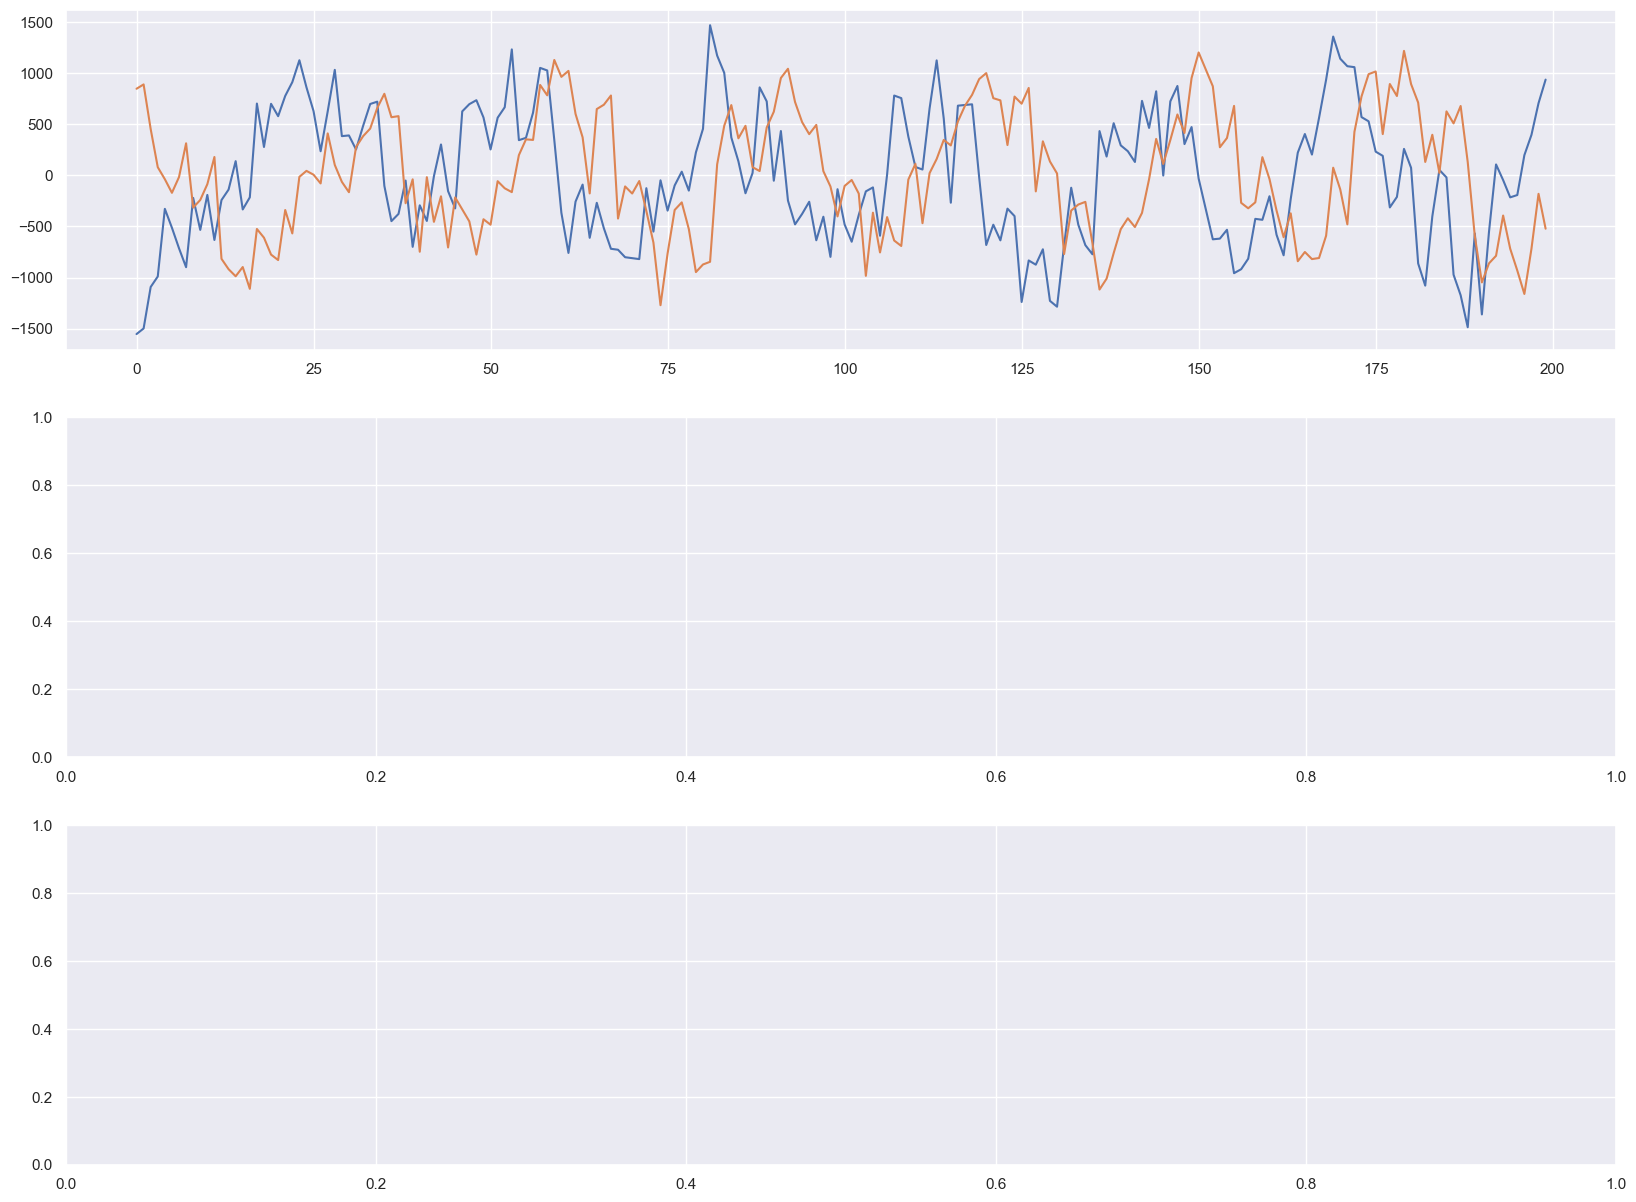

In [176]:
frame_nr = 300
data_type = data_arr[frame_nr][:4].decode()
print("TYPE: ", data_type)
length = int.from_bytes(
   data_arr[frame_nr][4:8], byteorder="little", signed=False)
print("length:", length)
data_RADC = data_arr[frame_nr][8:8+length]
print(len(data_RADC))

data_RADC = np.frombuffer(data_RADC,dtype=np.uint16)
data_RADC = data_RADC.reshape(3,256,512)
data_RADC_I = data_RADC[:,:,::2]
data_RADC_Q = data_RADC[:,:,1::2]
data_RADC_I = detrend(data_RADC_I, axis=2)
data_RADC_Q = detrend(data_RADC_Q, axis=2)
plt.figure(figsize=(10,10))
fig, axs = plt.subplots(3, 1)
axs[0].plot(data_RADC_I[0,0,:200])
axs[0].plot(data_RADC_Q[0,0,:200])
# axs[1].plot(data_RADC_rx1[0,0,:])
# axs[1].plot(data_RADC_rx1[0,1,:])
# axs[2].plot(data_RADC[2,10,0,:])
# axs[2].plot(data_RADC[2,10,1,:])

plt.show()

### Test of formatting

In [177]:
data_formated = np.zeros((256,2,128))
for i in range(0,256*2*256,256*2):
    slice_v = int(i/(256*2))
    
    data_I = test_save[i:i+256]
    data_Q = test_save[i+256:i+256*2]
    data_formated[slice_v,0,:] = data_I[:128]
    data_formated[slice_v,1,:] = data_Q[:128]


In [178]:
data_formated_2 = []
data_formated_2 = np.array(data_formated_2)
print(data_formated_2.shape)
for i in range(0,256*2*256,256*2):
    slice_v = int(i/(256*2))
    
    data_I = test_save[i:i+256]
    data_Q = test_save[i+256:i+256*2]
    data_formated_2= np.concatenate((data_formated_2 ,data_I[:128], data_Q[:128]), axis=None)
data_formated_2 = data_formated_2.reshape(256,2,128)

(0,)


In [179]:
df = pd.DataFrame(data_formated_2[:,0,:])
df

0        1        2        3        4        5        6        7    \
0        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1        7.0  65465.0    822.0    200.0     32.0      1.0      9.0      0.0   
2    34496.0  33392.0  33776.0  33552.0  33104.0  33616.0  33296.0  33376.0   
3    34016.0  33296.0  33936.0  33344.0  33104.0  33952.0  33392.0  33632.0   
4    34096.0  33552.0  33568.0  33328.0  33408.0  33632.0  33536.0  33472.0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
251  33712.0  33648.0  33584.0  33632.0  33488.0  33744.0  33696.0  33520.0   
252  33792.0  34048.0  33696.0  33472.0  33104.0  33552.0  33616.0  33248.0   
253  33856.0  33952.0  33632.0  33344.0  33392.0  33584.0  33328.0  33264.0   
254  34464.0  33616.0  33744.0  33264.0  33328.0  33776.0  33232.0  33424.0   
255  33552.0  33728.0  33920.0  33232.0  33360.0  33840.0  33520.0  33376.0   

         8        9    ...      118      119      120      121      122  \
0        0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
1     1592.0    794.0  ...     28.0      1.0     78.0      0.0    344.0   
2    33136.0  33360.0  ...  33088.0  33824.0  33184.0  33712.0  33648.0   
3    33472.0  33600.0  ...  33328.0  33872.0  33552.0  33936.0  33408.0   
4    33280.0  33664.0  ...  33392.0  34304.0  33104.0  33680.0  33328.0   
..       ...      ...  ...      ...      ...      ...      ...      ...   
251  33200.0  33616.0  ...  33280.0  33792.0  33360.0  34048.0  32944.0   
252  33104.0  33568.0  ...  33296.0  34272.0  33440.0  34000.0  32816.0   
253  33312.0  33536.0  ...  33456.0  33696.0  33120.0  33968.0  33024.0   
254  33264.0  33616.0  ...  33472.0  33680.0  33408.0  34016.0  33152.0   
255  33264.0  33472.0  ...  33520.0  33776.0  33648.0  34192.0  32848.0   

         123      124      125      126      127  
0        0.0      0.0      0.0      0.0      0.0  
1     1923.0     35.0      1.0    135.0      0.0  
2    34160.0  33456.0  33840.0  32512.0  33664.0  
3    34064.0  33232.0  34080.0  32768.0  33728.0  
4    33600.0  33488.0  33744.0  32880.0  33600.0  
..       ...      ...      ...      ...      ...  
251  33984.0  33088.0  33440.0  33120.0  33696.0  
252  33888.0  32992.0  33520.0  32912.0  33408.0  
253  34224.0  33008.0  33664.0  32864.0  33440.0  
254  33952.0  33168.0  33328.0  32480.0  33488.0  
255  34112.0  33072.0  33616.0  32960.0  33552.0  

[256 rows x 128 columns]

# FFT

In [180]:
from numpy import sort


def fft_filter(data, sample_period,plot=False):
    """
    This function takes a data matrix and filters it with a frequency range.
    :param data:
    :param sample_period:
    :param freq_range:
    :return:
    """

    # Generate frequency axis and take FFT
    spectrum = np.fft.fft(data, 256,axis=0)  # takes FFT of all channels withe zero padding
    #spectrum = np.trim_zeros(spectrum, trim='fb')
    power_spectrum = 20*np.log10(np.abs(spectrum))
    num_of_samples = data.shape[0]  # returns shape of matrix
   
    freq = np.fft.fftfreq(n=len(data))
    freq = np.fft.fftshift(freq,)
    power_spectrum = np.fft.fftshift(power_spectrum)
    sorted = np.argsort(power_spectrum)
    df = pd.DataFrame(freq[sorted])
    print(df)
    print("Max freq bin:",freq[np.argmax(power_spectrum[130:])])
    if plot:
        plt.figure(figsize=(15, 5))
        plt.plot(freq,power_spectrum)
        #plt.xlim(-0.01,0.01)
        
        plt.show()
    
    return power_spectrum, freq

# RMRD
fetch and format the RMRD data


TYPE:  RMRD
length: 262144
12183
2432


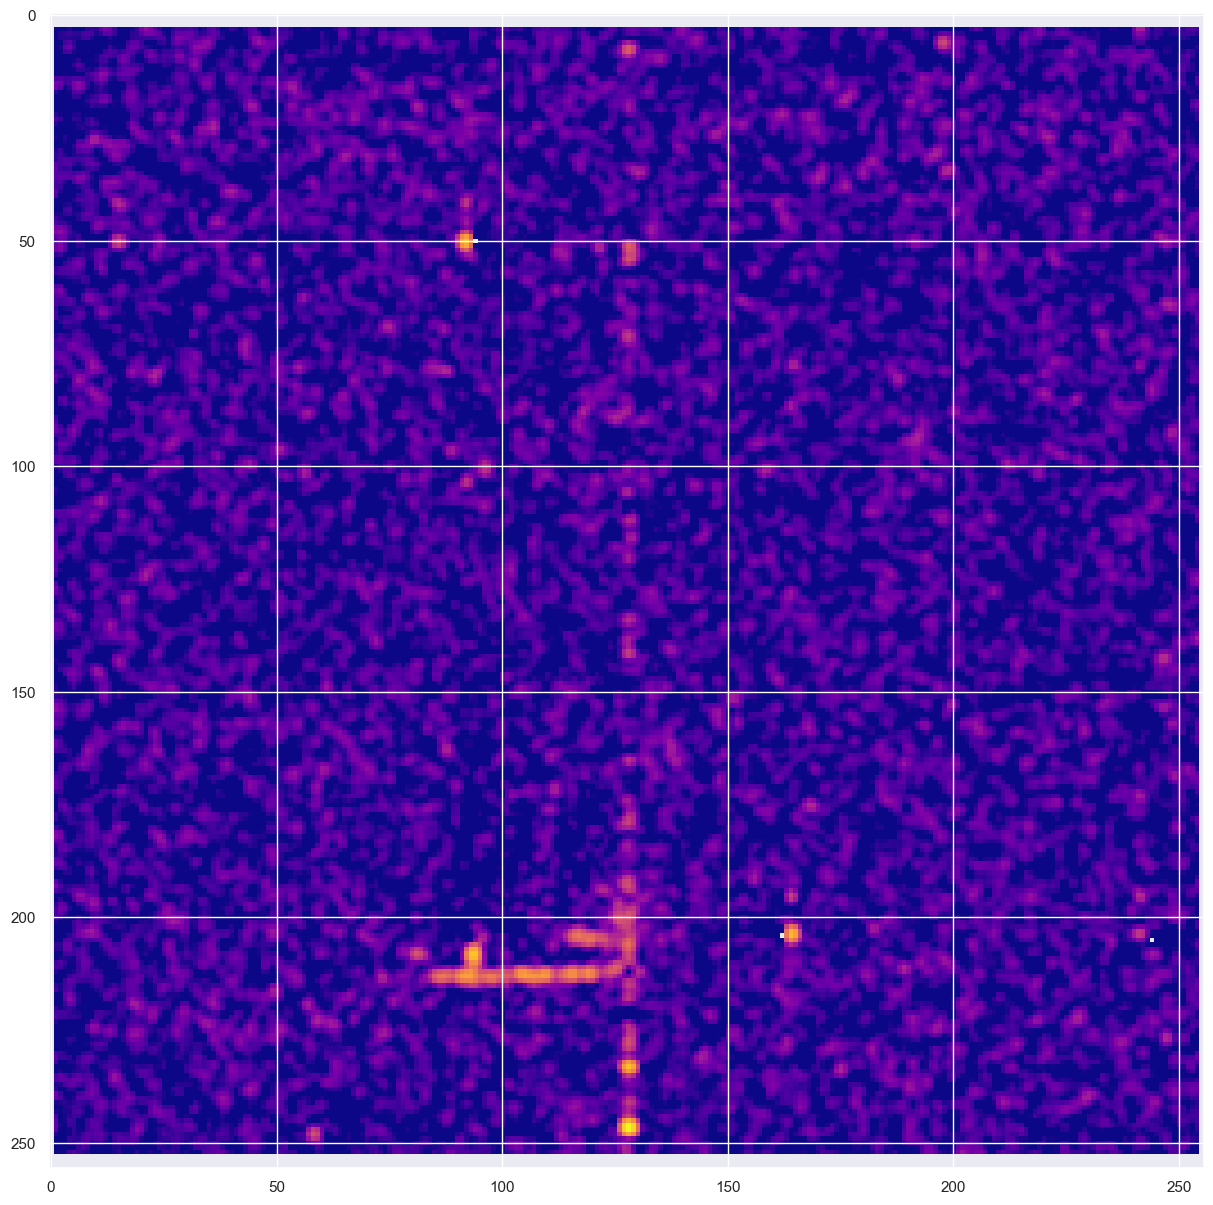

In [196]:
data_type = data_arr[frame_nr][8+length:8+length+4].decode()
print("TYPE: ", data_type)
length_2 = int.from_bytes(
   data_arr[frame_nr][8+length+4:8+length+4+4], byteorder="little", signed=False)
print("length:", length_2)
data_RMRD = data_arr[frame_nr][8+length+8:8+length+8+length_2]
data_RMRD = np.frombuffer(data_RMRD,dtype=np.uint32)
    
    

    
data_RMRD = data_RMRD.reshape(256,256)
print(np.max(data_RMRD))
print(np.argmax(data_RMRD))
data_RMRD = np.flip(data_RMRD, axis=0)
plt.imshow(data_RMRD, cmap='plasma',norm=LogNorm(vmin=100))
plt.show()

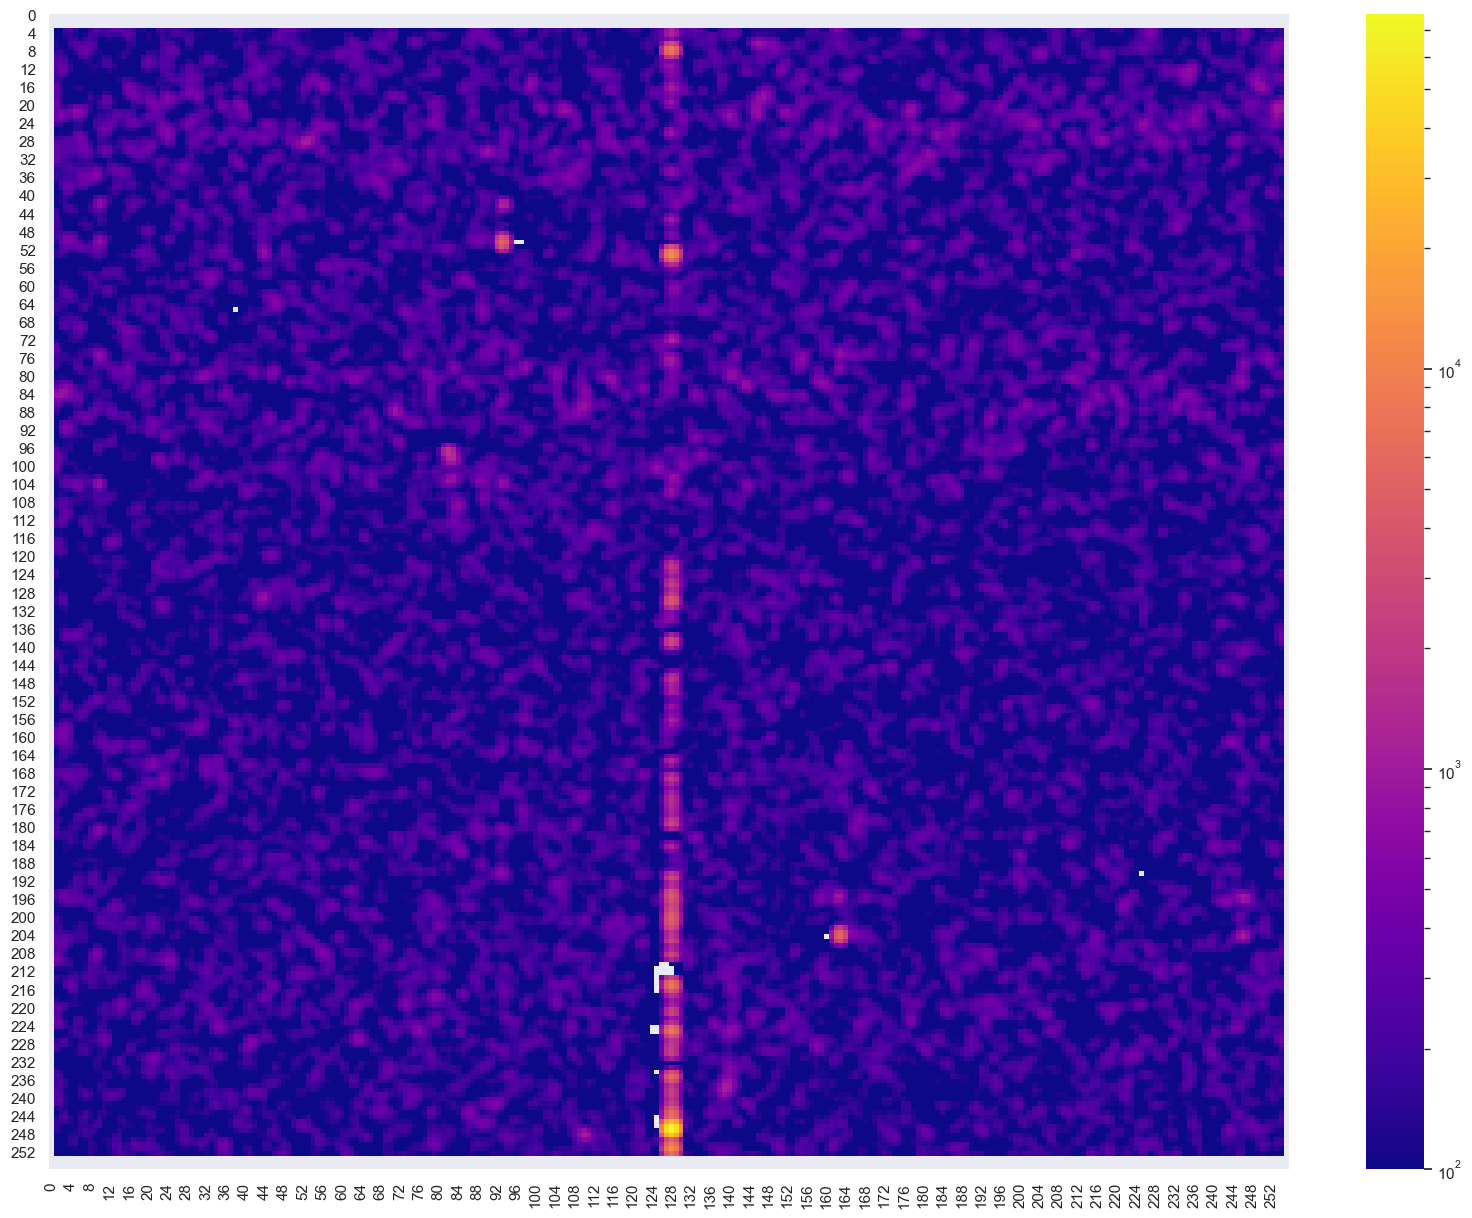

In [182]:


ax = sns.heatmap(data_RMRD,norm =LogNorm(vmin=100),cmap='plasma')

# Step 4: Doppler processing

## Create the doppler matrix

Each row equals one chirp.
we therfor first need to take the fft of axis 1 (the chirps) and then the fft of axis 0 (the samples)

In [183]:
data_IF = data_RADC_I[:,:,:] + 1j*data_RADC_Q[:,:,:]
data_IF = np.mean(data_IF, axis=0)
print(data_IF.shape)
df =pd.DataFrame(data_IF)
df

(256, 256)


0                       1                       2    \
0   -602.252594-134.511349j  -366.323325-31.365835j -98.3940570-88.2203210j   
1   -466.557231-128.816472j -353.147795-105.680983j -63.7383590-39.8788280j   
2   -661.446174-214.465467j -228.144308-143.361326j  -226.842443-13.590518j   
3    -493.456226+13.451038j -97.3732360-54.1425330j  37.3764210-57.7361030j   
4    -343.353761-66.027399j  -491.370758+42.495691j  -292.721088-40.981218j   
..                      ...                     ...                     ...   
251 -692.427043-125.007296j -445.913890-112.565082j -188.734070-121.456201j   
252 -589.979572-144.040694j  -359.343948-94.241192j -70.0416570-12.4416900j   
253  -738.501297-60.463197j  -289.282006-32.010708j -181.3960408+1.7751140j   
254  -682.837387-65.205415j -142.832616-122.008869j  -152.161179+45.187676j   
255  -517.659857-39.946660j  -116.340793-86.023222j  -104.355062-30.766451j   

                       3                      4                       5    \
0   -17.131455-123.741474j  304.131147+48.737373j   28.060416-109.450446j   
1    -67.662257-22.076673j  179.080512-84.274517j   20.489948-135.805695j   
2    243.792756+14.846956j  37.094621-191.382237j   214.396487-72.278096j   
3    -62.540589-55.996340j  -18.457599-22.256577j   41.625391-121.850147j   
4   -115.404751-33.791461j   179.244919+5.398297j   31.2279220+7.2547210j   
..                     ...                    ...                     ...   
251  260.445750-34.347320j  144.292237-16.571773j  6.805390-0116.1295590j   
252  112.593967-69.308854j  119.229591-67.509352j  -34.134785-129.709850j   
253  -14.843423-17.772396j  71.709201-138.653241j  136.9284902+1.7992480j   
254 -134.823075-64.949111j  266.515028-47.085899j   113.186465-29.222686j   
255 -108.369331-82.176347j  164.949733+26.413758j  112.935464-110.329471j   

                        6                       7                       8    \
0   -77.3436480-43.6382660j -108.081046-105.826085j  138.514889-136.013905j   
1     128.566051+52.663127j  289.975486-142.868051j  158.051589-183.732563j   
2     55.698352-118.507288j  222.333551-223.403147j  218.302083-125.632340j   
3     197.708381-24.110384j  65.7913710-70.3706210j  77.8743610-25.9641910j   
4     160.544259+14.444478j  204.527262-127.699098j  211.176932-104.509340j   
..                      ...                     ...                     ...   
251 -173.3481203+8.3126550j  137.165030-144.578464j   53.011517-238.802916j   
252 -16.8324940-37.2436810j   21.803130-158.110845j  140.438754-134.978010j   
253   218.147784-92.414929j   91.367075-229.295773j  103.253033-104.843284j   
254   119.857902-48.692807j -81.4706610-36.1629280j  207.867443-247.633049j   
255  119.587861-204.406033j -12.4264080+16.1840710j  -32.440677-179.225824j   

                        9    ...                     246  \
0     17.110824-128.868391j  ...   92.347509-174.048276j   
1    -43.205642-149.930407j  ...  130.830642-154.819593j   
2    -89.729385-118.528199j  ...  229.479385-141.513468j   
3   -198.042649-114.891094j  ...   110.959316-11.900572j   
4    84.4932690-33.3195830j  ...   108.465064-73.347084j   
..                      ...  ...                     ...   
251   48.858003-109.027369j  ...  184.475330-157.555964j   
252  -39.592288-127.845174j  ...   39.717288-112.029826j   
253 -215.527676-177.724128j  ...  185.444343+106.849128j   
254 -126.794453-160.436503j  ...  174.336120-209.521830j   
255 -57.7882790-22.6357190j  ...  14.8299460-57.4476140j   

                        247                    248                     249  \
0     184.276778-97.569429j   20.206046-42.423915j   197.468648-56.611734j   
1    180.240078-185.017437j   80.316180-23.215282j   225.725616-85.413127j   
2     124.114584-75.742660j  184.083116-63.305186j   302.718315-72.201045j   
3     176.375639-36.827476j   44.458629-24.421046j   243.208286-92.014616j   
4     323.114734+35.176007j  -43.568929-10.967569j  187.080741-158.444478j   
..          

In [184]:

data_IF_test = data_formated_2[:,0,:] + 1j*data_formated_2[:,1,:]
print(data_IF_test.shape)
df =pd.DataFrame(data_IF_test)
df

(256, 128)


0                 1                 2                 3    \
0    0.00000+0.00000j  0.00000+0.00000j  0.00000+0.00000j  0.00000+0.00000j   
1    7.0+3000930.000j  65465.0+16577.0j  822.0000+0.0000j  200.0+016256.00j   
2    34496.0+32480.0j  33392.0+33760.0j  33776.0+32192.0j  33552.0+33264.0j   
3    34016.0+31968.0j  33296.0+33552.0j  33936.0+32320.0j  33344.0+33344.0j   
4    34096.0+32560.0j  33552.0+33664.0j  33568.0+32624.0j  33328.0+33392.0j   
..                ...               ...               ...               ...   
251  33712.0+31984.0j  33648.0+33712.0j  33584.0+31936.0j  33632.0+33008.0j   
252  33792.0+31616.0j  34048.0+33552.0j  33696.0+32080.0j  33472.0+33216.0j   
253  33856.0+32304.0j  33952.0+33584.0j  33632.0+32544.0j  33344.0+33280.0j   
254  34464.0+32352.0j  33616.0+33488.0j  33744.0+32592.0j  33264.0+33008.0j   
255  33552.0+32032.0j  33728.0+33696.0j  33920.0+32400.0j  33232.0+32992.0j   

                  4                 5                 6                 7    \
0    0.00000+0.00000j  0.00000+0.00000j  0.00000+0.00000j  0.00000+0.00000j   
1     32.0+406839.00j  1.0+4009100.000j  9.0+1003107.000j  0.0+1006835.000j   
2    33104.0+31888.0j  33616.0+33040.0j  33296.0+31920.0j  33376.0+32704.0j   
3    33104.0+32208.0j  33952.0+33136.0j  33392.0+31920.0j  33632.0+32528.0j   
4    33408.0+32544.0j  33632.0+33072.0j  33536.0+32128.0j  33472.0+32736.0j   
..                ...               ...               ...               ...   
251  33488.0+31968.0j  33744.0+33200.0j  33696.0+32192.0j  33520.0+32512.0j   
252  33104.0+32080.0j  33552.0+33120.0j  33616.0+32160.0j  33248.0+32496.0j   
253  33392.0+32464.0j  33584.0+33120.0j  33328.0+32160.0j  33264.0+32896.0j   
254  33328.0+32400.0j  33776.0+33232.0j  33232.0+32016.0j  33424.0+32720.0j   
255  33360.0+32656.0j  33840.0+33152.0j  33520.0+31920.0j  33376.0+32928.0j   

                  8                 9    ...               118  \
0    0.00000+0.00000j  0.00000+0.00000j  ...  0.00000+0.00000j   
1     1592.0+18842.0j  794.0+017780.00j  ...   28.0+304832.00j   
2    33136.0+32144.0j  33360.0+32480.0j  ...  33088.0+34752.0j   
3    33472.0+31968.0j  33600.0+32560.0j  ...  33328.0+35056.0j   
4    33280.0+31872.0j  33664.0+32576.0j  ...  33392.0+35264.0j   
..                ...               ...  ...               ...   
251  33200.0+32352.0j  33616.0+32768.0j  ...  33280.0+35056.0j   
252  33104.0+32384.0j  33568.0+32720.0j  ...  33296.0+35120.0j   
253  33312.0+31792.0j  33536.0+32544.0j  ...  33456.0+35360.0j   
254  33264.0+31840.0j  33616.0+32448.0j  ...  33472.0+34944.0j   
255  33264.0+32160.0j  33472.0+32432.0j  ...  33520.0+34848.0j   

                  119               120               121               122  \
0    0.00000+0.00000j  0.00000+0.00000j  0.00000+0.00000j  0.00000+0.00000j   
1    1.0+3001792.000j   78.0+304512.00j  0.0+3001744.000j  344.0+034816.00j   
2    33824.0+31776.0j  33184.0+34752.0j  33712.0+32016.0j  33648.0+34928.0j   
3    33872.0+32016.0j  33552.0+34720.0j  33936.0+31952.0j  33408.0+34800.0j   
4    34304.0+31984.0j  33104.0+35024.0j  33680.0+32016.0j  33328.0+34768.0j   
..                ...               ...               ...               ...   
251  33792.0+31712.0j  33360.0+34464.0j  34048.0+31904.0j  32944.0+34960.0j   
252  34272.0+31872.0j  33440.0+35104.0j  34000.0+32000.0j  32816.0+34624.0j   
253  33696.0+31696.0j  33120.0+35024.0j  33968.0+32064.0j  33024.0+34736.0j   
254  33680.0+31824.0j  33408.0+35008.0j  34016.0+31872.0j  33152.0+35168.0j   
255  33776.0+31648.0j  33648.0+34800.0j  34192.0+31888.0j  32848.0+34912.0j   

                  123               124               125               126  \
0    0.00000+0.00000j  0.00000+0.00000j  0.00000+0.00000j  0.00000+0.00000j   
1     1923.0+32176.0j   35.0+304912.00j  1.0+3002112.000j  135.0+035472.00j   
2    34160.0+32096.0j  33456.0+35312.0j  33840.0+31792.0j  32512.0+35456.0j   
3    34064.0+31888.0j  33232.0+34800.0j  34080.0+32032.0j  327

            0
0   -0.460938
1   -0.144531
2    0.109375
3    0.347656
4   -0.011719
..        ...
251 -0.445312
252  0.207031
253  0.136719
254 -0.140625
255  0.000000

[256 rows x 1 columns]
Max freq bin: -0.37109375


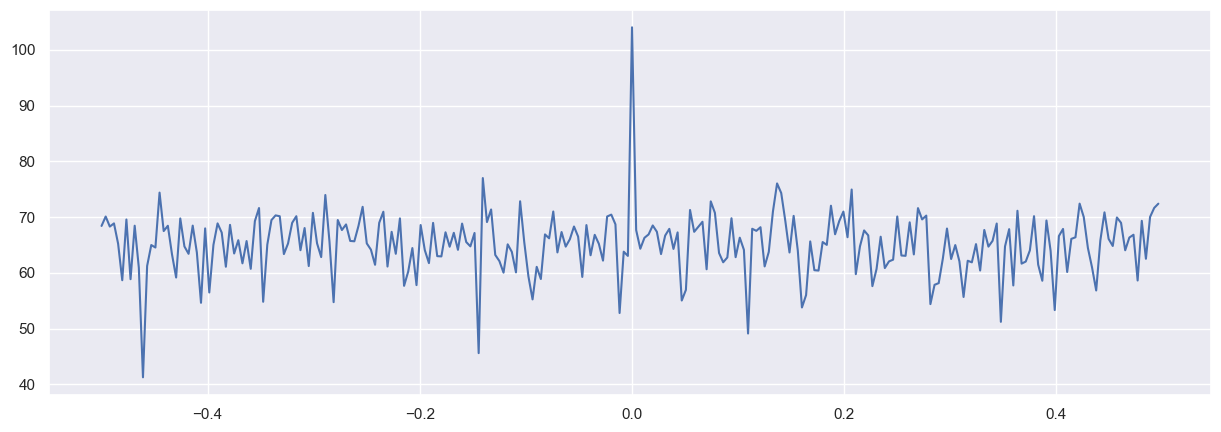

In [185]:
power, freq = fft_filter(data_IF[:,0],0,plot = True)

In [186]:
data_range_fft = np.fft.fft(data_IF, axis=1,n=512)
#data_range_fft = np.fft.fftshift(data_range_fft, axes=1)

data_abs = np.abs(data_range_fft)
df =pd.DataFrame(data_abs)



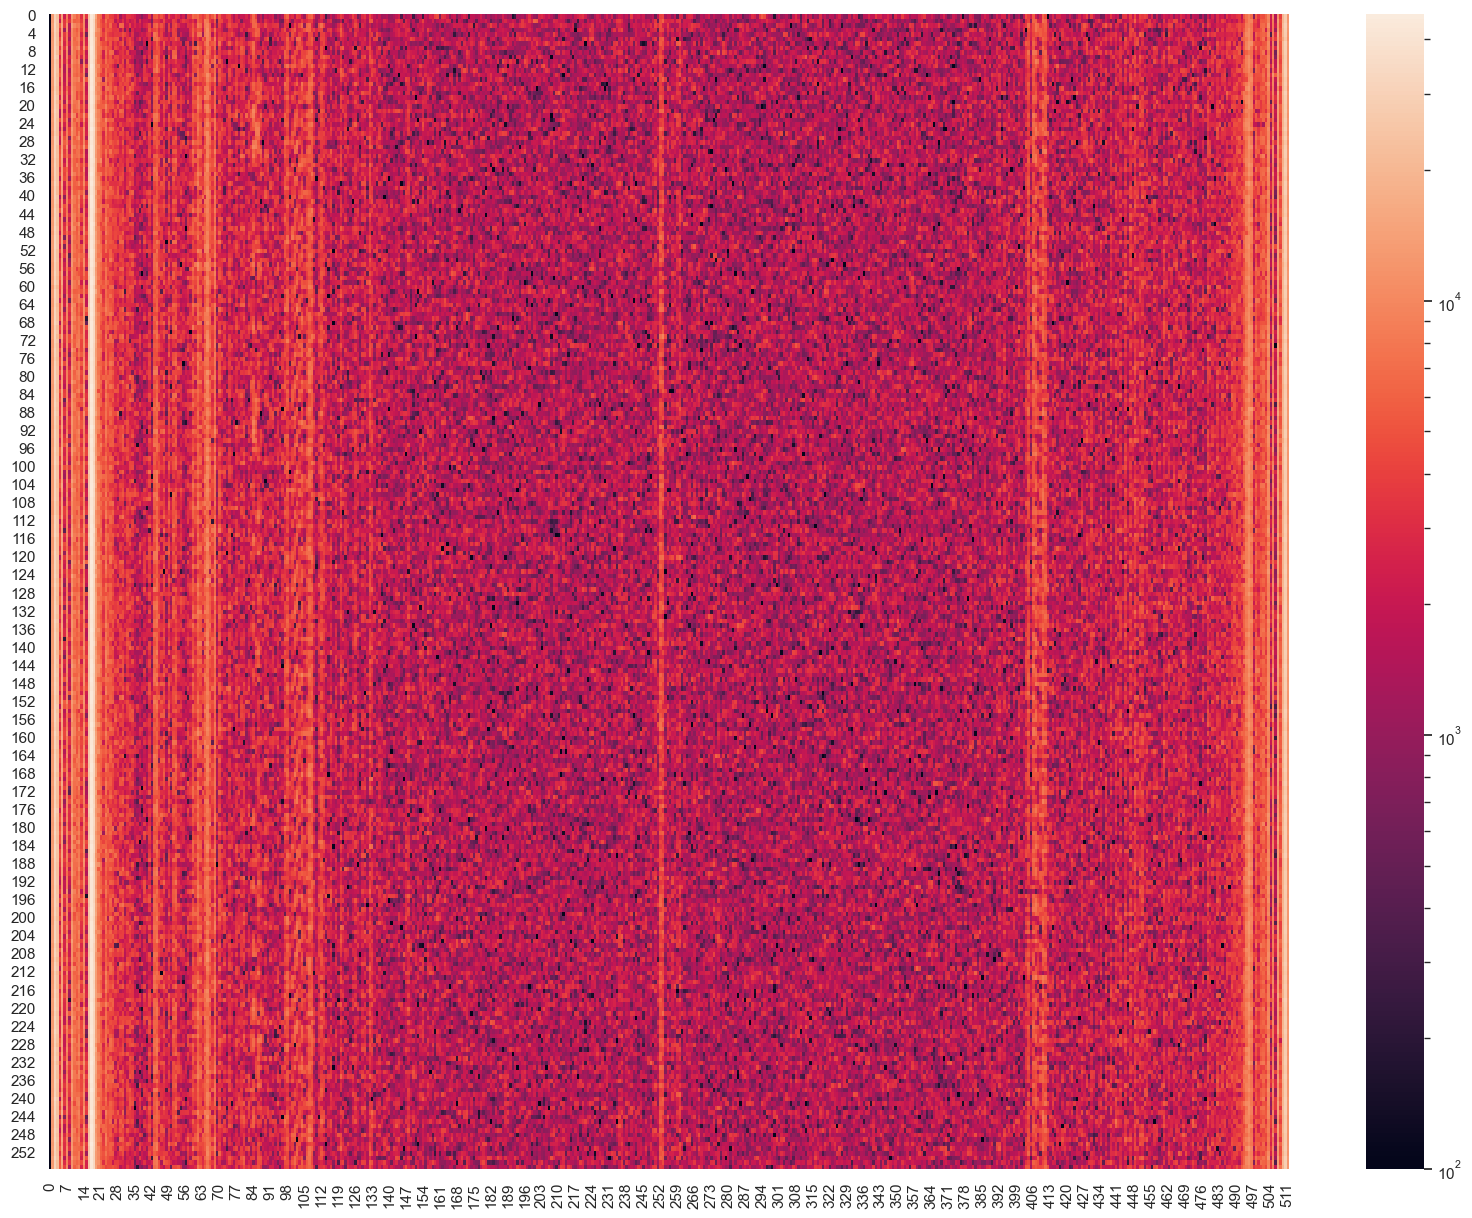

In [187]:
ax = sns.heatmap(data_abs,norm =LogNorm(vmin=100))

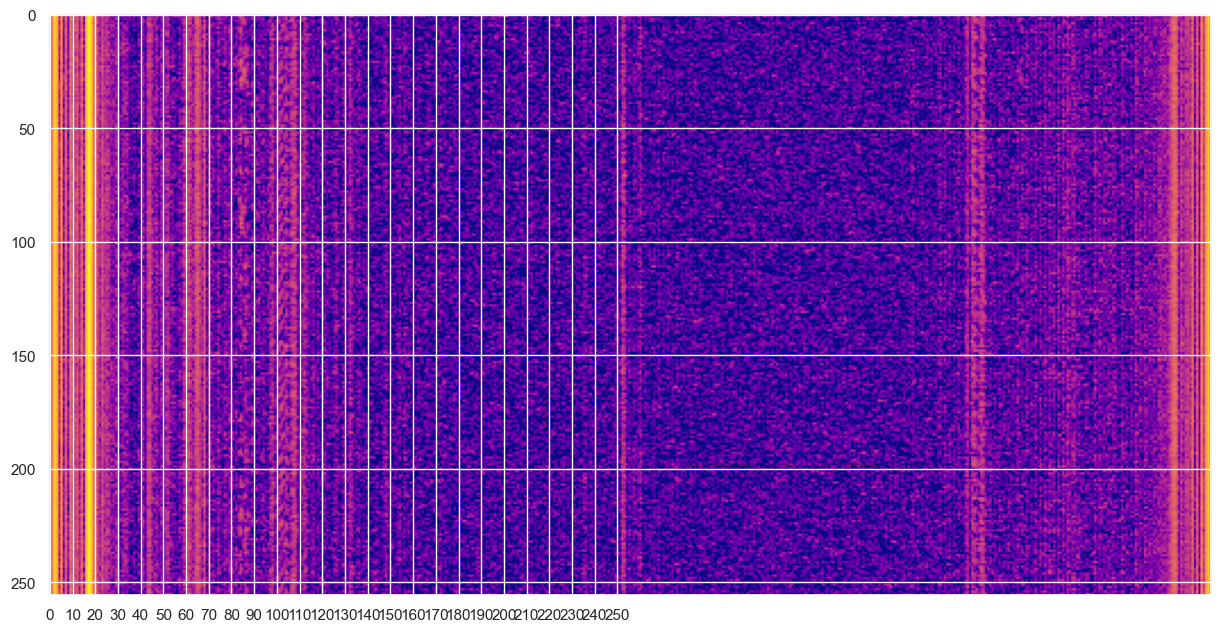

In [188]:
plt.figure(figsize=(15,15))
plt.imshow(data_abs, cmap='plasma',norm =LogNorm(vmin=1000))
plt.xticks(np.arange(0, 256, 10))
plt.show()

In [189]:
data_doppler_fft = np.fft.fft(data_range_fft, axis=0, n= 1024)
data_doppler_fft = np.fft.fftshift(data_doppler_fft, axes=0)
data_abs = np.abs(data_doppler_fft)
df =pd.DataFrame(data_abs)


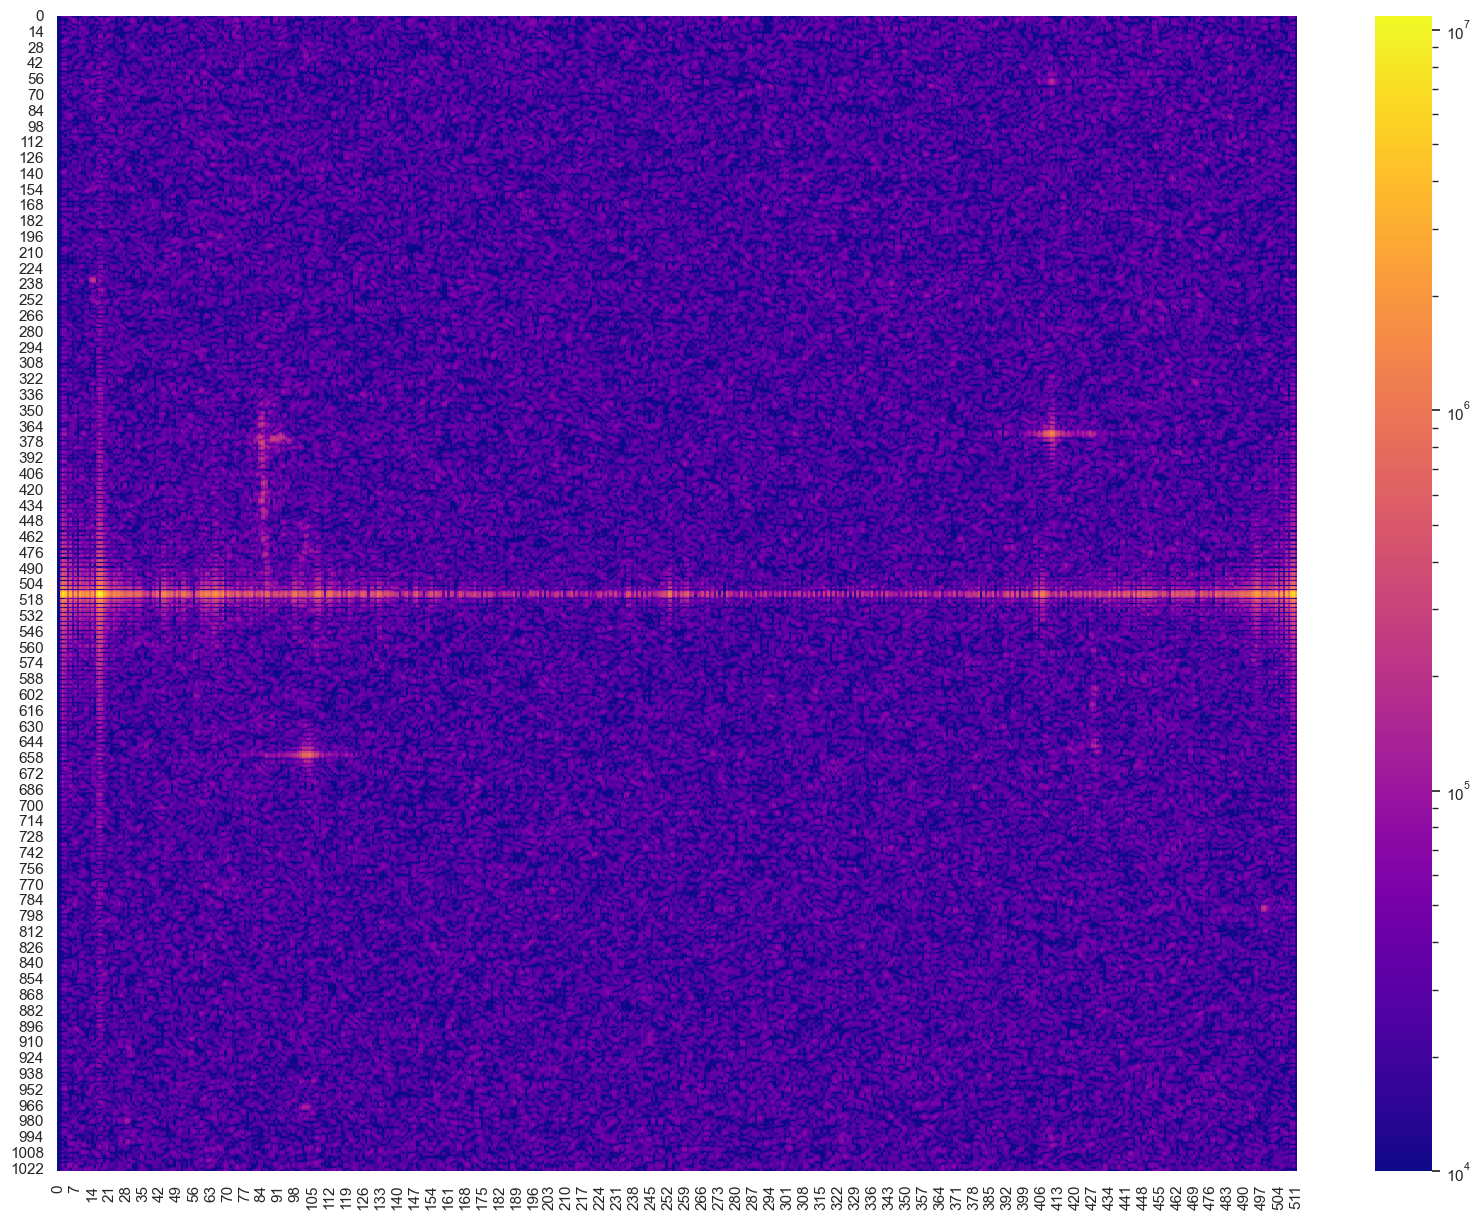

In [195]:
ax = sns.heatmap(data_abs.T,norm =LogNorm(vmin=10000),cmap='plasma')

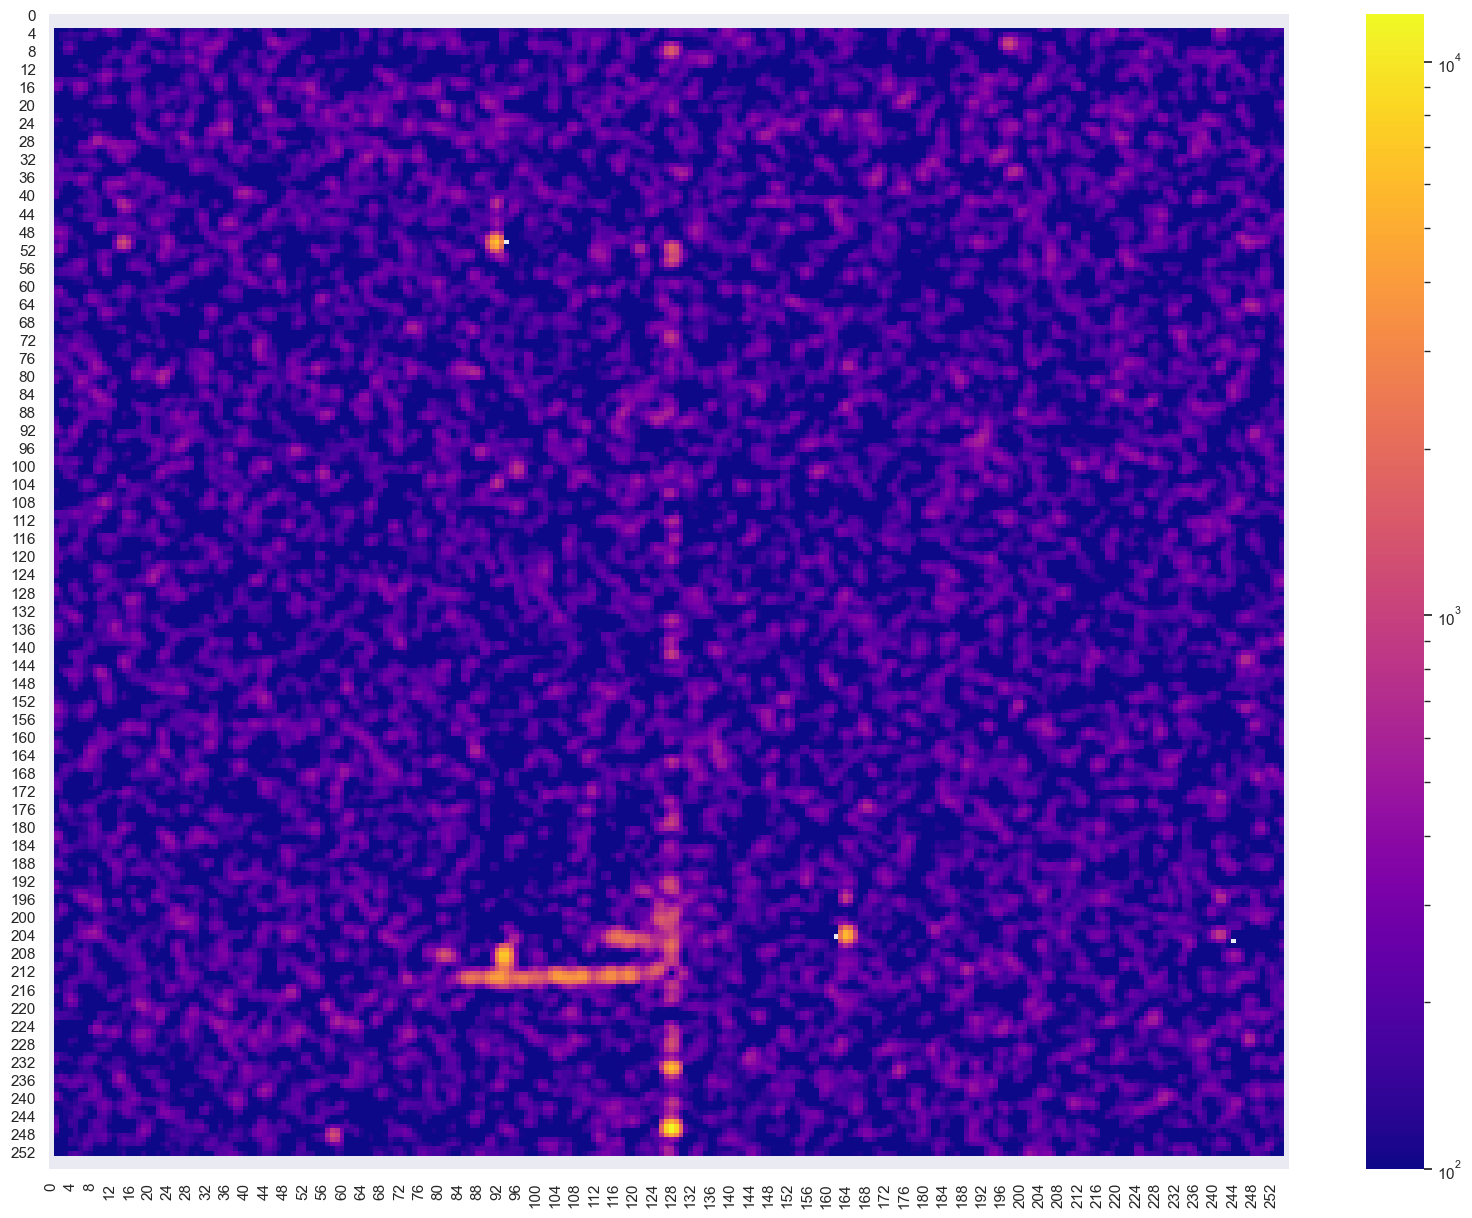

In [197]:
sns.set(rc={'figure.figsize':(20,15)})

ax = sns.heatmap(data_RMRD,norm =LogNorm(vmin=100),cmap='plasma')

## Calculate 2d-fft

# Theory


## Spatial Doppler signal

$$
\begin{align}
y[l,m] = Aexp(-j\frac{4\pi}{\lambda}R_l)exp(-j2\pi\frac{2v}{\lambda}mT)
\end{align}
$$

Sampling rate fast time or range dim: bandwidth of the radar. this will in most cases corespond the the chirp width.

B = 191.0153846 MHz (from the datasheet) 



$$f_{max}-f_{min} = KT_r$$

The frequency is swept linearly with a positive slope of K and a duration of 𝑇𝑟

L = range bins (number of samples in the range dimension)
L = 256

M= doppler bins (number of samples in the doppler dimension)

PRI = Pulse Repetition Interval = T = 12 core clocks

PRF = Pulse Repetition Frequency = 1/T = 83.3333333 MHz

CPI = Coherent Processing Interval
The total amount of time MT represented by the data matrix is called the coherent processing interval

## The slow-time
The sampling rate ofslow time is PFR

Each row of the matrix represents a series of measurements from the same range bin over M successive pulses

M = number of successive pulses

$$f_d = 2v/\lambda$$

The slow-time or pulse number dimension (horizontal in the figure) is sampled at the pulse repetition interval (PRI) T of the radar. Thus, the sampling rate in this dimension is the pulse repetition frequency (PRF).

The total amount of time MT represented by the data matrix is called the coherent processing interval (CPI)